In [1]:
import numpy as np

import matplotlib.pyplot as plt

#%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Dense , Conv2D, Flatten, MaxPooling2D, BatchNormalization

from tensorflow.keras import utils

from tensorflow.keras.datasets import mnist

In [10]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [11]:
from sklearn.model_selection import train_test_split
x=np.concatenate((x_train, x_test))
y=np.concatenate((y_train, y_test))
print("dataset shape",x.shape)
print("labels shape",y.shape)
train_size=0.6
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=train_size)
print("training data",x_train.shape)
print("training labels",y_train.shape)
print("testing data",x_test.shape)
print("testing labels",y_test.shape)

dataset shape (70000, 28, 28)
labels shape (70000,)
training data (42000, 28, 28)
training labels (42000,)
testing data (28000, 28, 28)
testing labels (28000,)


/home/gitanjali/anaconda3/envs/intel_python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


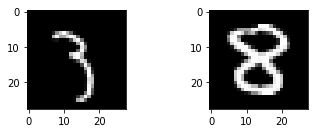

In [12]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))

In [13]:
x_train=np.expand_dims(x_train, axis=3)
x_test=np.expand_dims(x_test, axis=3)

input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3])
print("input_shape",input_shape)

# precise the pixel value to be 32 bit
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# normalize input from 0-255 to 0-1
x_train = x_train / 255.
x_test = x_test / 255.

print("normalize training data", x_train.shape)
print("normalize testing data", x_test.shape)
print("training labels", y_train.shape)
print("testing labels", y_test.shape)

input_shape (28, 28, 1)
normalize training data (42000, 28, 28, 1)
normalize testing data (28000, 28, 28, 1)
training labels (42000,)
testing labels (28000,)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
                   tf.keras.layers.Conv2D(32, 3, strides=(1,1), activation='relu'),
                   tf.keras.layers.BatchNormalization(),
                   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
                   tf.keras.layers.Conv2D(64, 3, strides=(1,1), activation='relu'),
                   tf.keras.layers.BatchNormalization(),
                   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
                   tf.keras.layers.Conv2D(128, 3, strides=(1,1), activation='relu'),
                   tf.keras.layers.BatchNormalization(),
                   tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
                   tf.keras.layers.Flatten(),
                   tf.keras.layers.Dropout(0.25),
                   tf.keras.layers.Dense(2048, activation='relu'),
                   tf.keras.layers.Dropout(0.25),
                   tf.keras.layers.Dense(10, activation='softmax')
                   ])


In [5]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn

from tensorflow.keras.optimizers import SGD, Adam

sgd = SGD(lr = 0.001, momentum = 0.9, decay = 1e-6)

In [6]:
model.compile(optimizer=sgd,
              loss=loss_fn,
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=200)


Train on 42000 samples, validate on 28000 samples
Epoch 1/20
42000/42000 [==============================] - 64s 2ms/sample - loss: 2.1472 - accuracy: 0.3779 - val_loss: 2.2644 - val_accuracy: 0.1180
Epoch 2/20
42000/42000 [==============================] - 72s 2ms/sample - loss: 1.8332 - accuracy: 0.6927 - val_loss: 1.9461 - val_accuracy: 0.6646
Epoch 3/20
42000/42000 [==============================] - 59s 1ms/sample - loss: 1.6599 - accuracy: 0.8790 - val_loss: 1.6127 - val_accuracy: 0.9166
Epoch 4/20
42000/42000 [==============================] - 58s 1ms/sample - loss: 1.5856 - accuracy: 0.9163 - val_loss: 1.5452 - val_accuracy: 0.9445
Epoch 5/20
42000/42000 [==============================] - 58s 1ms/sample - loss: 1.5588 - accuracy: 0.9314 - val_loss: 1.5286 - val_accuracy: 0.9506
Epoch 6/20
42000/42000 [==============================] - 59s 1ms/sample - loss: 1.5429 - accuracy: 0.9404 - val_loss: 1.5203 - val_accuracy: 0.9563
Epoch 7/20
42000/42000 [==============================] 

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [18]:
from keras.models import model_from_json
# save trained model
# serialize model to JSON
model_json = model.to_json()
with open("Q3_part2_mnist_trained_model_sgd_20_epochs_variation2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5 and saving the weights
model.save_weights("Q3_part2_mnist_trained_model_sgd_20_epochs_variation2.h5")
print("Saved model to disk")

Using TensorFlow backend.


Saved model to disk


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


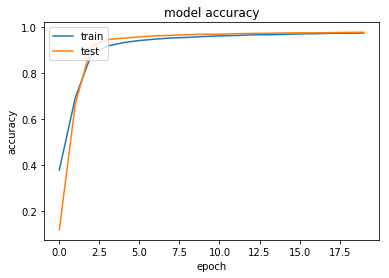

In [12]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

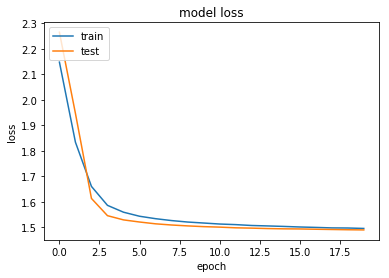

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# Final evaluation of the model

scores = model.evaluate(x_test, y_test)

print("Accuracy : %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

28000/28000 [==============================] - 20s 707us/sample - loss: 1.4893 - accuracy: 0.9764
Accuracy : 97.64%
Baseline Error: 2.36%


In [8]:
model.load_weights("Q3_part2_mnist_trained_model_sgd_20_epochs_variation2.h5")


In [14]:
import tensorflow as tf
y= model.predict(x_test)
print(y.shape)
y_pred = np.argmax(y, axis=1)
print(y_pred.shape)

con = tf.math.confusion_matrix(labels=y_test, predictions=y_pred )
print(con)

(28000, 10)
(28000,)
tf.Tensor(
[[2750    2    6    0    7    3    8    0    9    5]
 [   0 3143   15    2    1    1    1   10    1    1]
 [   2    6 2736   15    5    1    3   33   11    2]
 [   0    6   23 2808    0    9    0   25    7    7]
 [   4    3    0    0 2671    0   12    1    7   22]
 [   4    6    1   12    3 2494    1    4    4    3]
 [  13    3    3    0   11    7 2701    0    3    1]
 [   4    6   27   13    9    0    0 2847    1    8]
 [   2    5    7    3   13   15    8    1 2670   22]
 [  16    2    0    3   14   19    1   10    8 2608]], shape=(10, 10), dtype=int32)


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2790
           1       0.99      0.99      0.99      3175
           2       0.97      0.97      0.97      2814
           3       0.98      0.97      0.98      2885
           4       0.98      0.98      0.98      2720
           5       0.98      0.98      0.98      2532
           6       0.99      0.99      0.99      2742
           7       0.97      0.98      0.97      2915
           8       0.98      0.97      0.98      2746
           9       0.97      0.97      0.97      2681

   micro avg       0.98      0.98      0.98     28000
   macro avg       0.98      0.98      0.98     28000
weighted avg       0.98      0.98      0.98     28000

